# Where should a global non-profit expand it reach in the remote areas of philipines ?

[Kiva.org](https://www.kiva.org/) is an online crowdfunding platform extending financial services to poor people around the world. Kiva lenders have provided over $1 billion dollars in loans to over 2 million people.

<center>
<img src="https://i.imgur.com/2G8C53X.png" width="500"><br/>
</center>

Kiva reaches some of the most remote places in the world through their global network of "Field Partners". These partners are local organizations working in communities to vet borrowers, provide services, and administer loans.

In this exercise, you'll investigate Kiva loans in the Philippines.  Can you identify regions that might be outside of Kiva's current network, in order to identify opportunities for recruiting new Field Partners?

In [1]:
import geopandas as gpd

from learntools.core import binder
binder.bind(globals())
from learntools.geospatial.ex1 import *

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


### 1) Get the data.

Use the next cell to load the shapefile located at `loans_filepath` to create a GeoDataFrame `world_loans`.  

In [2]:
loans_filepath = "../input/geospatial-learn-course-data/kiva_loans/kiva_loans/kiva_loans.shp"

world_loans = gpd.read_file(loans_filepath)


In [3]:
world_loans.shape

(13662, 7)

In [4]:
world_loans.country.value_counts()

Philippines      3083
Armenia           942
Colombia          822
Mexico            615
Kenya             568
                 ... 
Cote D'Ivoire       1
Benin               1
South Sudan         1
Bhutan              1
Canada              1
Name: country, Length: 79, dtype: int64

In [5]:
# This dataset is provided in GeoPandas
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [6]:
# This dataset is provided in GeoPandas
cities_filepath = gpd.datasets.get_path('naturalearth_cities')
world_cities = gpd.read_file(cities_filepath)
#India = world_cities.loc[world_loans.name.isin(['India'])].copy()
#India
import numpy as np
names = world_cities.name.to_numpy(world_cities.name)
names

array(['Vatican City', 'San Marino', 'Vaduz', 'Luxembourg', 'Palikir',
       'Majuro', 'Funafuti', 'Melekeok', 'Monaco', 'Tarawa', 'Moroni',
       'Andorra', 'Port-of-Spain', 'Kigali', 'Mbabane', 'Juba',
       'Ljubljana', 'Bratislava', 'Doha', 'Podgorica', 'Bern', 'Pristina',
       'Roseau', 'Djibouti', 'Banjul', 'Skopje', 'Bridgetown',
       'Bujumbura', 'Kingstown', 'Castries', 'Basseterre', 'Port Louis',
       "Saint George's", 'Manama', "Saint John's", 'Montevideo', 'Lome',
       'Tunis', 'Abu Dhabi', 'Ashgabat', 'Lusaka', 'Harare', 'Dili',
       'Port Vila', 'Tegucigalpa', 'Georgetown', 'Reykjavík',
       'Port-au-Prince', 'Kampala', 'Paramaribo', 'Niamey', 'Dushanbe',
       'Asuncion', 'Managua', 'Freetown', 'Islamabad', 'Kathmandu',
       'Bloemfontein', 'Pretoria', 'Port Moresby', 'Honiara',
       'Panama City', 'Rabat', 'Chisinau', 'Maputo', 'Mogadishu',
       'Muscat', 'Colombo', 'Ulaanbaatar', 'Wellington', 'Windhoek',
       'Abuja', 'Bissau', 'Amman', 'Vilniu

In [7]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

<AxesSubplot:>

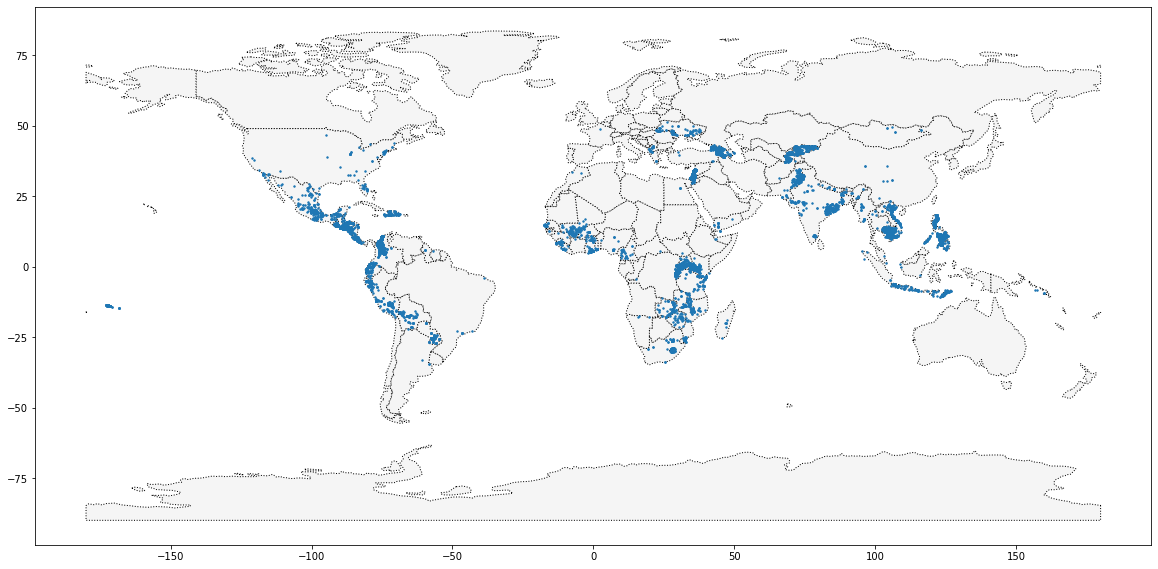

In [8]:
ax = world.plot(figsize=(20,20), color='whitesmoke', linestyle=':', edgecolor='black')
world_loans.plot(ax=ax, markersize=2)

In [9]:
PHL_loans = world_loans.loc[world_loans.country.isin(['Philippines'])].copy()
print(PHL_loans.shape)
PHL_loans.head()

(3083, 7)


,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
2859,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.73961 17.64228)
2860,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.74169 17.63235)
2861,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,400,POINT (121.46667 16.60000)
2862,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,6050,POINT (121.73333 17.83333)
2863,123,Alalay sa Kaunlaran (ASKI),General Financial Inclusion,General,Philippines,625,POINT (121.51800 16.72368)


In [10]:
# Your code here
PHL_loans = world_loans.loc[world_loans.country.isin(['India'])].copy()
print(PHL_loans.shape)
# Check your answer
q_3.check()

PHL_loans.head()

(294, 7)


<IPython.core.display.Javascript object>

<span style="color:#cc3333">Incorrect:</span> The results don't look right.  Try again.

,Partner ID,Field Part,sector,Loan Theme,country,amount,geometry
10688,225,Novica,Artisan,Artisan,India,2100,POINT (78.00807 27.17667)
10702,225,Novica,Artisan,Artisan,India,1200,POINT (76.08560 29.05878)
10703,225,Novica,Artisan,Artisan,India,4000,POINT (75.78727 26.91243)
10709,225,Novica,Artisan,Artisan,India,6050,POINT (77.20902 28.61394)
10799,238,WSDS-Initiate,General Financial Inclusion,Underserved,India,2675,POINT (87.31652 23.06788)


### 4) Understand loans in the Philippines.

Run the next code cell without changes to load a GeoDataFrame `PHL` containing boundaries for all islands in the Philippines.

In [11]:
# Load a KML file containing island boundaries
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
PHL = gpd.read_file("../input/geospatial-learn-course-data/Philippines_AL258.kml", driver='KML')
PHL.head()

,Name,Description,geometry
0,Autonomous Region in Muslim Mindanao,,"MULTIPOLYGON (((119.46690 4.58718, 119.46653 4..."
1,Bicol Region,,"MULTIPOLYGON (((124.04577 11.57862, 124.04594 ..."
2,Cagayan Valley,,"MULTIPOLYGON (((122.51581 17.04436, 122.51568 ..."
3,Calabarzon,,"MULTIPOLYGON (((120.49202 14.05403, 120.49201 ..."
4,Caraga,,"MULTIPOLYGON (((126.45401 8.24400, 126.45407 8..."


<AxesSubplot:>

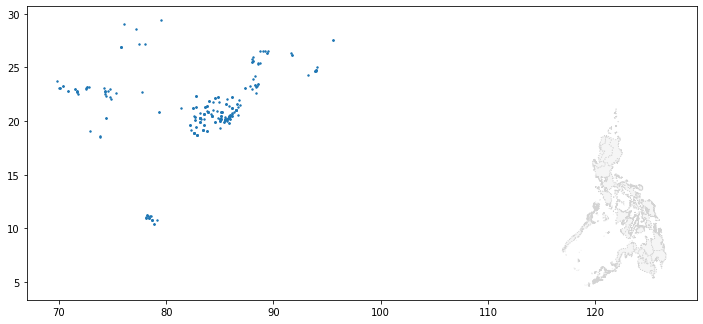

In [12]:
ax = PHL.plot(figsize=(12,12), color='whitesmoke', linestyle=':', edgecolor='lightgray')
PHL_loans.plot(ax=ax, markersize=2)